In [1]:
from sdm.utils import set_project_wd
set_project_wd()

Current Working Directory: /Users/matthewwhittle/Data Science/shefflied-bats


## Load the Data

In [2]:
import pandas as pd
import geopandas as gpd

bats_raw = pd.read_excel("data/raw/bats/SYBG Database 21st April 2023 (9782) rows) GS.xlsx", sheet_name="Species recordings")
bats_raw.head()

Recorder                 Date  \
0                                       BCT/NE  2010-05-17 00:00:00   
1                                Giles Manners  2014-07-03 00:00:00   
2  Natural England Volunteer Bat Roost Visitor  2013-11-28 00:00:00   
3                                       BCT/NE  2010-08-31 00:00:00   
4                                       BCT/NE  2009-05-20 00:00:00   

  GridReference GridRef6Fig GridSquare House number/name Address line 1  \
0      NZ115084    NZ115084     NZ1108               NaN            NaN   
1    NZ14640021    NZ146002     NZ1400               NaN            NaN   
2    NZ20291106    NZ202110     NZ2011               NaN            NaN   
3      NZ170014    NZ170014     NZ1701               NaN            NaN   
4      NZ185116    NZ185116     NZ1811               NaN            NaN   

  Address line 2   Address line 3 Post Code  ... Access points  \
0            NaN  North Yorkshire  DL11 7HS  ...           NaN   
1            NaN         Richmond  DL11 6BJ  ...           NaN   
2       Richmond  North Yorkshire  DL11 7TW  ...           NaN   
3            NaN  North Yorkshire  DL10 4BA  ...           NaN   
4            NaN  North Yorkshire  DL11 7RT  ...           NaN   

  Roost (Location)                 Notes                   Species_ORG  \
0                Y                   NaN            Common pipistrelle   
1              NaN  Method of ID unknown  Pipistrelle sp.                
2              NaN                   NaN  Soprano Pipistrelle            
3                Y                   NaN             Vespertillionidae   
4                Y                   NaN             Vespertillionidae   

                Species_UNI   Number                         Evidence  \
0        Common pipistrelle       11                              NaN   
1          Pipistrellus sp.        0                              NaN   
2       Soprano pipistrelle  Unknown  Live bat identified in the hand   
3  Unidentified bat species        0                              NaN   
4  Unidentified bat species  Unknown                              NaN   

           Source Alternative date R or Foraging  
0  BCT/NE Records              NaN             R  
1             NaN              NaN           NaN  
2  BCT/NE Records              NaN           NaN  
3  BCT/NE Records              NaN             R  
4  BCT/NE Records              NaN             R  

[5 rows x 23 columns]

## Select & Tidy Columns

In [3]:
bats_raw.columns

Index(['Recorder', 'Date', 'GridReference', 'GridRef6Fig', 'GridSquare',
       'House number/name', 'Address line 1', 'Address line 2',
       'Address line 3', 'Post Code', 'Type', 'Structure type',
       'Roost report form', 'Access points', 'Roost (Location)', 'Notes',
       'Species_ORG', 'Species_UNI', 'Number', 'Evidence', 'Source',
       'Alternative date', 'R or Foraging'],
      dtype='object')

In [4]:
column_mappings = {"Date" : "date", "GridReference":"grid_reference", "Species_UNI":"species_raw", "R or Foraging" : "activity_type"}
bats = bats_raw.rename(columns=column_mappings)
columns_keep = [tidy_name for tidy_name in column_mappings.values()]
bats = bats[columns_keep]
bats.head()

date grid_reference               species_raw activity_type
0  2010-05-17 00:00:00       NZ115084        Common pipistrelle             R
1  2014-07-03 00:00:00     NZ14640021          Pipistrellus sp.           NaN
2  2013-11-28 00:00:00     NZ20291106       Soprano pipistrelle           NaN
3  2010-08-31 00:00:00       NZ170014  Unidentified bat species             R
4  2009-05-20 00:00:00       NZ185116  Unidentified bat species             R

In [5]:
bats.dtypes

date              object
grid_reference    object
species_raw       object
activity_type     object
dtype: object

## Species Tidying

In [6]:
bats.species_raw.value_counts().to_dict()

{'Common pipistrelle': 3344,
 'Unidentified bat species': 1386,
 'Pipistrellus sp.': 1386,
 "Daubenton's bat": 709,
 'Soprano pipistrelle': 526,
 'Brown long-eared bat': 519,
 'Noctule': 467,
 "Natterer's bat": 411,
 'Myotis sp.': 277,
 "Whiskered/Brandt's/Alcathoe bat": 168,
 "Leisler's bat": 157,
 'Whiskered bat': 156,
 'Common Pipistrelle': 74,
 'common pipistrelle': 46,
 'Nyctalus sp.': 45,
 'Absent': 37,
 "Brandt's bat": 21,
 "Noctule/Leisler's bat/Serotine": 19,
 'soprano pipistrelle': 16,
 'noctule': 15,
 "Daubenton's Bat": 10,
 'brown long-eared bat': 10,
 'Soprano Pipistrelle': 8,
 "Leisler's Bat": 5,
 "Brandt's Bat": 3,
 "Nathusius' pipistrelle": 3,
 'Serotine': 3,
 'Whiskered Bat': 2}

I've prepared a json file mapping the species names in the dataset to their correct common and latin names + genus. This will help us tidy the species column and group the bats appropriately in modelling.

In [7]:
import json
with open("data/processed/species-mappings.json", "r") as f:
    species_mappings_dict = json.load(f)

# Convert to a dictionary 
species_mappings_df = pd.DataFrame.from_dict(species_mappings_dict, orient='index')
species_mappings_df.reset_index(inplace=True, names = ["species_raw"])

species_mappings_df.head()

species_raw                 latin_name  \
0        Common pipistrelle  Pipistrellus pipistrellus   
1  Unidentified bat species                    Unknown   
2          Pipistrellus sp.           Pipistrellus sp.   
3           Daubenton's bat         Myotis daubentonii   
4       Soprano pipistrelle      Pipistrellus pygmaeus   

                common_name         genus  
0        Common Pipistrelle  Pipistrellus  
1          Unidentified Bat       Unknown  
2  Unidentified Pipistrelle  Pipistrellus  
3           Daubenton's Bat        Myotis  
4       Soprano Pipistrelle  Pipistrellus

In [8]:
bats = bats.merge(species_mappings_df, on="species_raw", how="left")
bats.head()

date grid_reference               species_raw activity_type  \
0  2010-05-17 00:00:00       NZ115084        Common pipistrelle             R   
1  2014-07-03 00:00:00     NZ14640021          Pipistrellus sp.           NaN   
2  2013-11-28 00:00:00     NZ20291106       Soprano pipistrelle           NaN   
3  2010-08-31 00:00:00       NZ170014  Unidentified bat species             R   
4  2009-05-20 00:00:00       NZ185116  Unidentified bat species             R   

                  latin_name               common_name         genus  
0  Pipistrellus pipistrellus        Common Pipistrelle  Pipistrellus  
1           Pipistrellus sp.  Unidentified Pipistrelle  Pipistrellus  
2      Pipistrellus pygmaeus       Soprano Pipistrelle  Pipistrellus  
3                    Unknown          Unidentified Bat       Unknown  
4                    Unknown          Unidentified Bat       Unknown

## Spatial Info

The grid references are in an alpha numeric format so I need to convert them in to EPSG:27700 coordinates. 

In [9]:
bats.grid_reference.value_counts()

SE328021        283
SE345034        224
SE534005         92
SE3302           57
SE350029         55
               ... 
SK2467097526      1
SK2469997489      1
SE2962800084      1
SK2458397753      1
TQ6194257642      1
Name: grid_reference, Length: 5386, dtype: int64

In [10]:
# First drop rows with a missing grid reference
missing_ref = bats.grid_reference.isna()
bats = bats[~missing_ref]
print(f"Dropped {missing_ref.sum()} rows with missing grid references")

Dropped 50 rows with missing grid references


In [11]:
# Remove any leading or trailing whitespace
bats.grid_reference = bats.grid_reference.str.strip()

In [12]:
# There are some poorly formatted grid references, so I'll check for them using a regex then fix / remove them
import re
def check_grid_reference(grid_ref):
    if pd.isna(grid_ref) or not isinstance(grid_ref, str):
        return False
    pattern = r"^[A-Za-z]{2} ?\d{1,5} ?\d{1,5}$"
    return bool(re.match(pattern, grid_ref))

bats["grid_reference_valid"] = bats.grid_reference.apply(check_grid_reference)
bats[bats.grid_reference_valid == False].grid_reference.to_dict()

{44: 'S 4811699289',
 957: 'SK401964toSK393980',
 8080: 'SK401964toSK393980',
 8155: 'SK41894978784'}

I've manually reviewed this subset of grid references and infered the correct locations from the context in the spreadsheet.

In [13]:
grid_reference_mappings = {
    44: "SK4811699289", # Checked address in grid ref finder
    957: "SK396970", # Taken estimated middle point
    8080: "SK397972", # Taken estimated middle point
    8155: "SK4189478784", # Checked post code in grid ref finder
}

for index, grid_ref in grid_reference_mappings.items():
    bats.loc[index, "grid_reference"] = grid_ref

bats.iloc[list(grid_reference_mappings.keys())]

date grid_reference           species_raw activity_type  \
44    2022-08-25 00:00:00   SK4811699289  Brown long-eared bat           NaN   
957   2011-07-01 00:00:00       SK396970   Soprano pipistrelle             f   
8080  2011-07-01 00:00:00       SK397972    Common pipistrelle           NaN   
8155  2012-06-01 00:00:00   SK4189478784      Pipistrellus sp.           NaN   

                     latin_name               common_name         genus  \
44             Plecotus auritus      Brown Long-Eared Bat      Plecotus   
957       Pipistrellus pygmaeus       Soprano Pipistrelle  Pipistrellus   
8080  Pipistrellus pipistrellus        Common Pipistrelle  Pipistrellus   
8155           Pipistrellus sp.  Unidentified Pipistrelle  Pipistrellus   

      grid_reference_valid  
44                   False  
957                  False  
8080                 False  
8155                 False

### Use the BNG package to convert

[GitHub](https://github.com/volcan01010/bng)

This gives the south west corner of the grid square. I will add half the resolution to get the centre of the grid square.

In [14]:
import os
import bng

def grid_ref_to_osgb36(grid_ref):
    if pd.isna(grid_ref):
        return (None, None)
    try:
        osgb36 = bng.to_osgb36(grid_ref)
        return osgb36
    except:
        return (None, None)

def calculate_accuracy(grid_ref):
    if pd.isna(grid_ref):
        return None
    num_digits = len(grid_ref) - 2
    accuracy = 10 ** (5 - num_digits // 2)
    return accuracy

xy = [grid_ref_to_osgb36(g) for g in bats.grid_reference]
x, y = zip(*xy)
bats["x"] = x
bats["y"] = y
bats["accuracy"] = bats.grid_reference.apply(calculate_accuracy)
# Move the x and y to middle of the squares
bats["x"] = bats.x + bats.accuracy / 2
bats["y"] = bats.y + bats.accuracy / 2
# Drop any rows with missing x or y
bats = bats[~bats.x.isna() & ~bats.y.isna()]

bats[["grid_reference", "x", "y", "accuracy"]].head()

grid_reference         x         y  accuracy
0       NZ115084  411550.0  508450.0     100.0
1     NZ14640021  414645.0  500215.0      10.0
2     NZ20291106  420295.0  511065.0      10.0
3       NZ170014  417050.0  501450.0     100.0
4       NZ185116  418550.0  511650.0     100.0

In [15]:
# convert to a geodataframe
bats_gdf = gpd.GeoDataFrame(bats, geometry=gpd.points_from_xy(bats.x, bats.y), crs = "EPSG:27700")
bats_gdf.head()

date grid_reference               species_raw activity_type  \
0  2010-05-17 00:00:00       NZ115084        Common pipistrelle             R   
1  2014-07-03 00:00:00     NZ14640021          Pipistrellus sp.           NaN   
2  2013-11-28 00:00:00     NZ20291106       Soprano pipistrelle           NaN   
3  2010-08-31 00:00:00       NZ170014  Unidentified bat species             R   
4  2009-05-20 00:00:00       NZ185116  Unidentified bat species             R   

                  latin_name               common_name         genus  \
0  Pipistrellus pipistrellus        Common Pipistrelle  Pipistrellus   
1           Pipistrellus sp.  Unidentified Pipistrelle  Pipistrellus   
2      Pipistrellus pygmaeus       Soprano Pipistrelle  Pipistrellus   
3                    Unknown          Unidentified Bat       Unknown   
4                    Unknown          Unidentified Bat       Unknown   

   grid_reference_valid         x         y  accuracy  \
0                  True  411550.0  508450.0     100.0   
1                  True  414645.0  500215.0      10.0   
2                  True  420295.0  511065.0      10.0   
3                  True  417050.0  501450.0     100.0   
4                  True  418550.0  511650.0     100.0   

                        geometry  
0  POINT (411550.000 508450.000)  
1  POINT (414645.000 500215.000)  
2  POINT (420295.000 511065.000)  
3  POINT (417050.000 501450.000)  
4  POINT (418550.000 511650.000)

In [16]:
from shapely.geometry import box, Point

def generate_grid_square(x, y, resolution:float):
    """Generate a grid square around a point with a given accuracy"""
    if pd.isna(x) or pd.isna(y):
        return None
    box_geom = box(x - resolution / 2, y - resolution / 2, x + resolution / 2, y + resolution / 2)
    return box_geom

bats_gdf["grid_square_geom"] = bats_gdf.apply(lambda row: generate_grid_square(row.x, row.y, row.accuracy), axis=1)
bats_gdf.head()

date grid_reference               species_raw activity_type  \
0  2010-05-17 00:00:00       NZ115084        Common pipistrelle             R   
1  2014-07-03 00:00:00     NZ14640021          Pipistrellus sp.           NaN   
2  2013-11-28 00:00:00     NZ20291106       Soprano pipistrelle           NaN   
3  2010-08-31 00:00:00       NZ170014  Unidentified bat species             R   
4  2009-05-20 00:00:00       NZ185116  Unidentified bat species             R   

                  latin_name               common_name         genus  \
0  Pipistrellus pipistrellus        Common Pipistrelle  Pipistrellus   
1           Pipistrellus sp.  Unidentified Pipistrelle  Pipistrellus   
2      Pipistrellus pygmaeus       Soprano Pipistrelle  Pipistrellus   
3                    Unknown          Unidentified Bat       Unknown   
4                    Unknown          Unidentified Bat       Unknown   

   grid_reference_valid         x         y  accuracy  \
0                  True  411550.0  508450.0     100.0   
1                  True  414645.0  500215.0      10.0   
2                  True  420295.0  511065.0      10.0   
3                  True  417050.0  501450.0     100.0   
4                  True  418550.0  511650.0     100.0   

                        geometry  \
0  POINT (411550.000 508450.000)   
1  POINT (414645.000 500215.000)   
2  POINT (420295.000 511065.000)   
3  POINT (417050.000 501450.000)   
4  POINT (418550.000 511650.000)   

                                    grid_square_geom  
0  POLYGON ((411600.000 508400.000, 411600.000 50...  
1  POLYGON ((414650.000 500210.000, 414650.000 50...  
2  POLYGON ((420300.000 511060.000, 420300.000 51...  
3  POLYGON ((417100.000 501400.000, 417100.000 50...  
4  POLYGON ((418600.000 511600.000, 418600.000 51...

The modelling will be at a 100m resolution so I will filter out any records that are less accurate than this resolution.

In [17]:
bats.accuracy.value_counts().sort_index()

1.0       3888
10.0       520
100.0     4908
1000.0     418
Name: accuracy, dtype: int64

In [18]:
bats_gdf.drop(columns=["grid_reference_valid"], inplace=True)
bats_gdf = bats_gdf.astype(
    {
        "grid_reference": "string",
        "species_raw": "string",
        "activity_type": "string",
        "latin_name": "string",
        "genus": "string",
        "date": "string",
    }
)

# Visualise the data

In [19]:
boundary = gpd.read_file("data/processed/boundary.geojson")

There are a lot of records outside south yorkshire. 

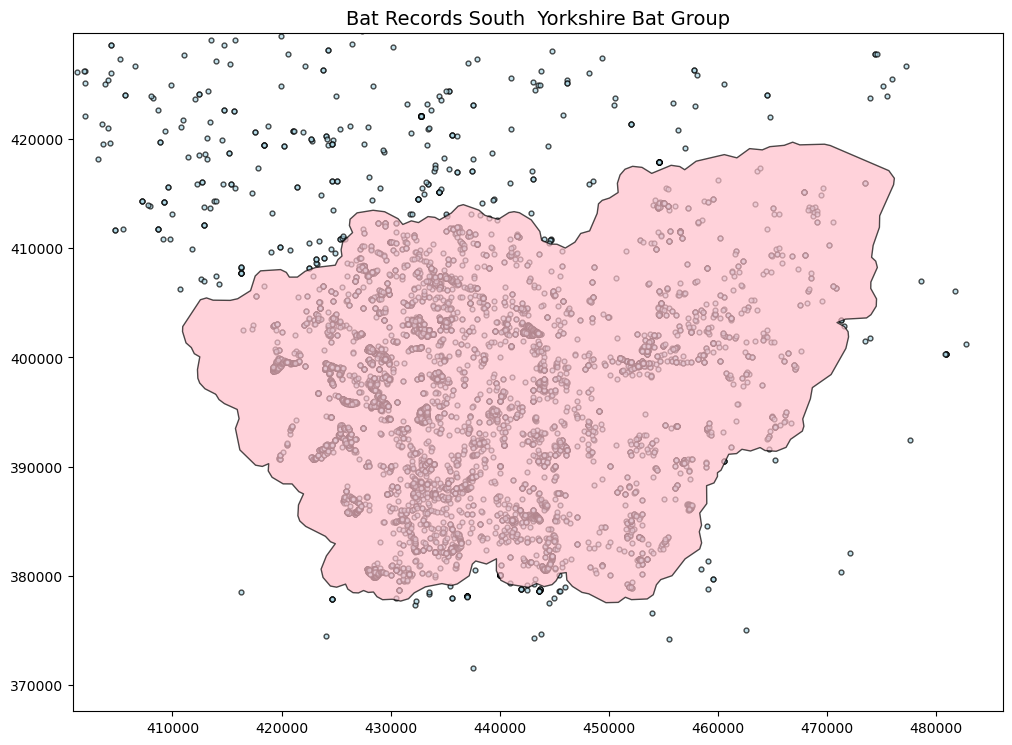

In [21]:
from fiona import bounds
import matplotlib.pyplot as plt
from numpy import size

fig, ax = plt.subplots(figsize=(12, 12))
# marker size
bats_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.7, markersize=12)
# set the x and y axis limits
bounds_lim = boundary.buffer(10000).total_bounds
ax.set_xlim(bounds_lim[0], bounds_lim[2])
ax.set_ylim(bounds_lim[1], bounds_lim[3])
# Add the boundary as a pink outline
boundary.plot(ax=ax, color="pink", edgecolor="black", alpha=0.7)
# Add title
ax.set_title("Bat Records South  Yorkshire Bat Group", fontsize=14)
plt.show()

In [21]:
bats_gdf.explore()

# Write to File

In [22]:
# write to parquet
bats_gdf.to_parquet("data/processed/sybg-bats.parquet")
# write to geojson
bats_gdf["grid_square_geom"] = bats_gdf.grid_square_geom.to_wkt()
bats_gdf.to_file("data/processed/sybg-bats.geojson", driver="GeoJSON")